In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#carregando a base de dados
df = pd.read_csv ('br_rj_rio_de_janeiro_ipp_ips_dimensoes_componentes.csv', sep = ',')
df

,ano,regiao_administrativa,ips_geral,necessidades_humanas_basicas_nota_dimensao,nutricao_cuidados_medicos_basicos,agua_saneamento,moradia,seguranca_pessoal,fundamentos_bem_estar_nota_dimensao,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,oportunidades_nota_dimensao,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
0,2016,Rio De Janeiro,60.77,75.84,70.19,83.68,78.16,71.34,53.28,49.96,50.89,62.03,50.26,53.20,61.46,54.82,64.14,32.36
1,2016,Portuaria,45.33,59.10,87.63,80.80,67.97,0.00,41.67,41.34,20.73,64.74,39.89,35.23,39.35,61.94,34.18,5.43
2,2016,Centro,57.75,62.43,59.38,74.18,91.85,24.31,52.41,55.60,56.00,41.04,56.99,58.42,45.89,87.27,52.24,48.26
3,2016,Rio Comprido,52.43,58.97,61.22,84.36,64.78,25.52,47.19,34.00,42.08,47.84,64.84,51.14,66.89,50.45,64.74,22.48
4,2016,Botafogo,87.12,93.32,85.15,98.49,99.55,90.08,81.13,78.47,86.52,81.46,78.07,86.91,68.19,85.74,94.30,99.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2020,Complexo Do Alemão,43.68,57.18,51.47,92.98,39.64,44.62,36.94,31.00,12.85,64.32,39.59,36.93,44.41,39.29,63.52,0.52
95,2020,Maré,47.20,66.22,54.12,82.18,69.04,59.56,34.85,33.74,15.34,75.46,14.86,40.52,46.13,52.13,61.57,2.26
96,2020,Vigário Geral,54.93,72.03,54.17,88.64,71.39,73.91,45.77,46.77,36.45,55.32,44.55,46.99,56.26,48.21,70.56,12.94
97,2020,Realengo,55.76,72.07,64.96,87.40,81.21,54.72,43.49,65.58,42.68,39.23,26.47,51.70,50.41,66.58,68.86,20.97


In [16]:
# ODS da ONU - 4 - Educaçao de qualidade: acesso_conhecimento_basico, acesso_informacao, acesso_educacao_superior

df_educacao = df[['ano', 'regiao_administrativa', 'acesso_conhecimento_basico', 'acesso_informacao', 'acesso_educacao_superior']]
df_educacao


,ano,regiao_administrativa,acesso_conhecimento_basico,acesso_informacao,acesso_educacao_superior
0,2016,Rio De Janeiro,49.96,50.89,32.36
1,2016,Portuaria,41.34,20.73,5.43
2,2016,Centro,55.60,56.00,48.26
3,2016,Rio Comprido,34.00,42.08,22.48
4,2016,Botafogo,78.47,86.52,99.39
...,...,...,...,...,...
94,2020,Complexo Do Alemão,31.00,12.85,0.52
95,2020,Maré,33.74,15.34,2.26
96,2020,Vigário Geral,46.77,36.45,12.94
97,2020,Realengo,65.58,42.68,20.97


In [17]:
# analisar evolucao por bienio e regiao administrativa, usando como parametros educacao basica, acesso a informacao e educacao superior
# a regiao que tem maior e menor acesso aos parametros ao longo dos anos, group by por ano de cada um dos itens

basico_ano = df_educacao.groupby (['ano'])['acesso_conhecimento_basico'].mean().reset_index()
informacao_ano = df_educacao.groupby (['ano']) ['acesso_informacao'].mean().reset_index()
superior_ano = df_educacao.groupby (['ano']) ['acesso_educacao_superior'].mean().reset_index()


In [18]:
# juntando essas 3 informaçoes sobre educacao basica, superior e acesso a informacao conseguimos ter uma analise 
# da evoluçao do topico 4 - educacao de qualidade - da ONU nos anos de 2016 a 2020.
#  RESULTADO: único parametro em que houve mudança foi o acesso ao conhecimento básico, melhorando a cada bienio

df_educacao_anos = pd.concat([basico_ano, informacao_ano , superior_ano])
df_educacao_anos = df_educacao_anos.sort_values(by= 'ano')
df_educacao_anos = df_educacao_anos.groupby(['ano'])[['acesso_conhecimento_basico', 'acesso_informacao', 'acesso_educacao_superior']].sum().reset_index()
df_educacao_anos

,ano,acesso_conhecimento_basico,acesso_informacao,acesso_educacao_superior
0,2016,47.589697,45.680909,31.214848
1,2018,49.420000,45.680909,31.214848
2,2020,57.034545,45.680909,31.214848


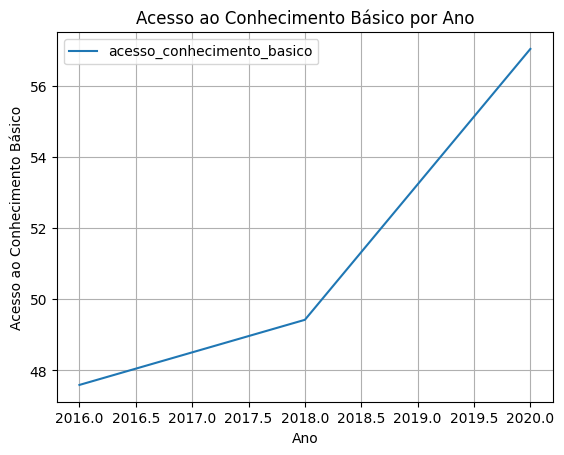

In [19]:
df_educacao_anos.plot(x='ano', y='acesso_conhecimento_basico', kind = 'line')
plt.title('Acesso ao Conhecimento Básico por Ano')
plt.xlabel('Ano')
plt.ylabel('Acesso ao Conhecimento Básico')
plt.grid(True)
plt.show()

In [20]:
#agora começa a analise por regiao administrativa

df_educacao_regiao_basico = df_educacao.groupby(['ano', 'regiao_administrativa'])['acesso_conhecimento_basico'].mean().reset_index()
df_educacao_regiao_basico

,ano,regiao_administrativa,acesso_conhecimento_basico
0,2016,Anchieta,55.83
1,2016,Bangu,44.22
2,2016,Barra Da Tijuca,58.25
3,2016,Botafogo,78.47
4,2016,Campo Grande,54.86
...,...,...,...
94,2020,Santa Teresa,82.54
95,2020,São Cristovão,66.57
96,2020,Tijuca,58.84
97,2020,Vigário Geral,46.77


In [21]:
# analisando no ano de 2016 a evolução do acesso ao conhecimento basicos nas regioes administrativas, 
# organizadas do menos acesso a regiao admiistrativa com maior acesso

df_educacao_regiao_basico_2016 = df_educacao_regiao_basico[df_educacao_regiao_basico['ano'] == 2016].copy()
df_educacao_regiao_basico_2016 = df_educacao_regiao_basico_2016.sort_values(by = 'acesso_conhecimento_basico')
df_educacao_regiao_basico_2016

,ano,regiao_administrativa,acesso_conhecimento_basico
7,2016,Complexo Do Alemão,0.00
14,2016,Jacarezinho,7.99
17,2016,Maré,24.35
26,2016,Rocinha,29.07
19,2016,Pavuna,32.01
24,2016,Rio Comprido,34.00
6,2016,Cidade De Deus,36.10
31,2016,Vigário Geral,38.60
21,2016,Portuaria,41.34
11,2016,Inhaúma,41.76


In [22]:
array_educacao_basico_2016 = np.array(df_educacao_regiao_basico_2016['acesso_conhecimento_basico'])
array_educacao_basico_2016

array([ 0.  ,  7.99, 24.35, 29.07, 32.01, 34.  , 36.1 , 38.6 , 41.34,
       41.76, 44.22, 44.5 , 46.19, 47.17, 47.44, 47.51, 49.96, 51.43,
       51.58, 53.93, 54.86, 55.35, 55.6 , 55.65, 55.83, 56.82, 58.25,
       60.43, 62.49, 63.06, 63.57, 78.47, 80.93])

In [23]:
# a media de acesso ao conhecimento basico em 2016 por regiao administrativa
media = np.mean(array_educacao_basico_2016)
media

np.float64(47.58969696969697)

In [24]:
#a madiana 

mediana = np.median(array_educacao_basico_2016)
mediana 

np.float64(49.96)

In [25]:
# os dados mostram que podemos utilizar tanto a media quanto a mediana para analisar 
# a taxa de conhecimento basico aos quais as pessoas de todas as regioes administrativas da cidade do rio de janeiro tem acesso
# porque a diferença entre os dois valores é negativa, inclusive

distancia = (media - mediana) / mediana
distancia_percentual = f'{(distancia * 100):.2f}%'
distancia_percentual

'-4.74%'

In [26]:
# analisando no ano de 2016 a evolução do acesso a educacao superior nas regioes administrativas, 

df_educacao_regiao_superior = df_educacao.groupby(['ano', 'regiao_administrativa'])['acesso_educacao_superior'].mean().reset_index()
df_educacao_regiao_superior

,ano,regiao_administrativa,acesso_educacao_superior
0,2016,Anchieta,17.01
1,2016,Bangu,14.45
2,2016,Barra Da Tijuca,67.74
3,2016,Botafogo,99.39
4,2016,Campo Grande,19.26
...,...,...,...
94,2020,Santa Teresa,34.25
95,2020,São Cristovão,16.83
96,2020,Tijuca,78.82
97,2020,Vigário Geral,12.94


In [27]:
# organizadas do menor acesso a regiao admiistrativa com maior acesso

df_educacao_regiao_superior_2016 = df_educacao_regiao_superior[df_educacao_regiao_superior['ano'] == 2016].copy()
df_educacao_regiao_superior_2016 = df_educacao_regiao_superior_2016.sort_values(by = 'acesso_educacao_superior')
df_educacao_regiao_superior_2016

,ano,regiao_administrativa,acesso_educacao_superior
7,2016,Complexo Do Alemão,0.52
26,2016,Rocinha,1.81
17,2016,Maré,2.26
14,2016,Jacarezinho,2.34
6,2016,Cidade De Deus,4.50
21,2016,Portuaria,5.43
9,2016,Guaratiba,5.68
27,2016,Santa Cruz,6.31
19,2016,Pavuna,10.97
31,2016,Vigário Geral,12.94


In [28]:
array_educacao_superior_2016 = np.array(df_educacao_regiao_superior['acesso_educacao_superior'])
array_educacao_superior_2016

array([17.01, 14.45, 67.74, 99.39, 19.26, 48.26,  4.5 ,  0.52, 83.53,
        5.68, 43.68, 30.81, 38.14, 34.08,  2.34, 81.59, 25.08,  2.26,
       47.82, 10.97, 23.19,  5.43, 24.39, 20.97, 22.48, 32.36,  1.81,
        6.31, 34.25, 16.83, 78.82, 12.94, 73.2 , 17.01, 14.45, 67.74,
       99.39, 19.26, 48.26,  4.5 ,  0.52, 83.53,  5.68, 43.68, 30.81,
       38.14, 34.08,  2.34, 81.59, 25.08,  2.26, 47.82, 10.97, 23.19,
        5.43, 24.39, 20.97, 22.48, 32.36,  1.81,  6.31, 34.25, 16.83,
       78.82, 12.94, 73.2 , 17.01, 14.45, 67.74, 99.39, 19.26, 48.26,
        4.5 ,  0.52, 83.53,  5.68, 43.68, 30.81, 38.14, 34.08,  2.34,
       81.59, 25.08,  2.26, 47.82, 10.97, 23.19,  5.43, 24.39, 20.97,
       22.48, 32.36,  1.81,  6.31, 34.25, 16.83, 78.82, 12.94, 73.2 ])

In [29]:
#separação dos dados sobre educação superior em quartis

q1 = np.percentile (array_educacao_superior_2016, 25)
q2 = np.percentile (array_educacao_superior_2016, 50)
q3 = np.percentile (array_educacao_superior_2016, 75)

print (f'O primeiro quartil é até {q1}, o segundo até {q2} e o terceiro até {q3}.')


O primeiro quartil é até 10.97, o segundo até 23.19 e o terceiro até 43.68.


In [30]:
#regioes administrativas com taxas mais altas de acesso a educacao superior 

q4_organizado = df_educacao_regiao_superior_2016[df_educacao_regiao_superior_2016['acesso_educacao_superior'] >= q3]
q4_organizado = q4_organizado.sort_values(by = 'acesso_educacao_superior', ascending=False)
q4_organizado

,ano,regiao_administrativa,acesso_educacao_superior
3,2016,Botafogo,99.39
8,2016,Copacabana,83.53
15,2016,Lagoa,81.59
30,2016,Tijuca,78.82
32,2016,Vila Isabel,73.20
2,2016,Barra Da Tijuca,67.74
5,2016,Centro,48.26
18,2016,Méier,47.82
10,2016,Ilha Do Governador,43.68


In [31]:
#regioes administrativas com taxas mais baixas de acesso a educacao superior 

q1_organizado = df_educacao_regiao_superior_2016[df_educacao_regiao_superior_2016['acesso_educacao_superior'] <= q2]
q1_organizado = q1_organizado.sort_values(by = 'acesso_educacao_superior', ascending=False)
q1_organizado

,ano,regiao_administrativa,acesso_educacao_superior
20,2016,Penha,23.19
24,2016,Rio Comprido,22.48
23,2016,Realengo,20.97
4,2016,Campo Grande,19.26
0,2016,Anchieta,17.01
29,2016,São Cristovão,16.83
1,2016,Bangu,14.45
31,2016,Vigário Geral,12.94
19,2016,Pavuna,10.97
27,2016,Santa Cruz,6.31


In [32]:
#organização dos dados de população com menor acesso a educacao superior para analise

array_q1_superior = np.array(q1_organizado['acesso_educacao_superior'])
array_q1_superior

array([23.19, 22.48, 20.97, 19.26, 17.01, 16.83, 14.45, 12.94, 10.97,
        6.31,  5.68,  5.43,  4.5 ,  2.34,  2.26,  1.81,  0.52])

In [33]:
#media de acesso a menor taxa de ducação superior do percentual de regioes administrativas da cidade do Rio de Janeiro

media_q4_superior = np.mean(array_q1_superior)
media_q4_superior

np.float64(10.997058823529413)

In [34]:
#mediana
#distancia entre as taxas de tendencia central nao e significativa, portanto pode-se usar as duas taxas como referencia 

mediana_q4_superior = np.median(array_q1_superior)
mediana_q4_superior

np.float64(10.97)

In [35]:
array_q4_superior = np.array(q4_organizado['acesso_educacao_superior'])
array_q4_superior

array([99.39, 83.53, 81.59, 78.82, 73.2 , 67.74, 48.26, 47.82, 43.68])

In [36]:
media_q4_superior = np.mean(array_q1_superior)
media_q4_superior

np.float64(10.997058823529413)

In [37]:
#mesmas conclusões no que diz respeito a regioes administrativas com mais acesso a educação superior

mediana_q4_superior = np.median(array_q1_superior)
mediana_q4_superior

np.float64(10.97)

In [ ]:
# analise de outliers das dados de educacao superior por regiao administrativa da cidade do rio de janeiro no ano de 2016
# intervalo interquartil

# IQR = Q3 - Q4
# Limite superior = Q3 + (1.5 × IQR)
# Limite inferior = Q1 - (1.5 × IQR)

IQR = q3 - q1
print (IQR)

limite_superior = q3 + (1.5 * IQR)
limite_inferior = q1 - (1.5 * IQR)

print (limite_superior)
print (limite_inferior)

32.71
92.745
-38.095


In [ ]:
# concluí-se que a região administrativa de Botafogo é um outlier em relação aos índices de educação superior, 
# com taxa de acesso a educação superior de mais de 99 pontos 

# O OBJETIVO AQUI ERA SOBREPOR AS REGIOES ADMINISTRATIVAS E AS TAXAS DE ACESSO A EDUCAÇÃO SUPERIOR EM UM GRÁFICO DE LINHA